# Import Packages

In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

import cv2 # Import OpenCV for face recognition with bounding box
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline  

import os.path

#import Python imaging Library = PIL
from PIL import Image
import glob

# Check Tensorflow Installation

In [2]:
# showing tensorflow version
print('Tensorflow version: ', tf.__version__)

Tensorflow version:  2.3.1


# Get the Location of the Images

In [3]:
# Check if this is running on Colab or local machine and set the path to load images

# Root folder where the images are located
relative_path_to_images = '/ProjectImages'
# Location on Google Drive where the images are stored
drive_image_location = '/My Drive' + relative_path_to_images 
# Location on my computer where the images are stored and synced to Google Drive
local_image_location = 'C:/Users/smaxw/MLProject' 


# Define a function that returns the location of the files
def get_images_location(): 
  gdrive_location = '/content/drive'

  #print('get_ipython: ' + str(get_ipython()))
  RunningInCOLAB = 'google.colab' in str(get_ipython())

  # If running on Colab mount google drive and set the location of images
  if RunningInCOLAB == True:
    from google.colab import drive
    drive.mount(gdrive_location, force_remount=True)
    location = gdrive_location + drive_image_location
    return location
  else:
    # If running locally set the location of the images to my c drive
    location = local_image_location + relative_path_to_images
    return location

print("location of images: ", get_images_location())

location of images:  C:/Users/smaxw/MLProject/ProjectImages


# Preprocess the Images

In [4]:
# Get all the subdirectories
#subdirs = os.listdir('/content/drive/')
#print('Sub directories: ' , subdirs)

subdirs = os.listdir(get_images_location())
print('Sub directories: ' , subdirs)

# Get a list of all the files in each of the subdirectories
def list_files(dir):
    r = []
    # os.walk returns a tuple
    for root, dirs, files in os.walk(get_images_location()):
        print(root,dirs,files)
        for name in files:
            r.append(os.path.join(root, name))
    return r

#print('All files: ', list_files(get_images_location()))

Sub directories:  ['FemaleAdult50', 'FemaleMinor50', 'MaleAdult50', 'MaleMinor50']


Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00926.png
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00928.png
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00937.png
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00952.png
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00956.png
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00964.png
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00967.png
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00970.png
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00976.png
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00977.png
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\00994.png
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdult50\01004.png
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\FemaleAdul

Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00178.jpg
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00179.jpg
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00225.jpg
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00384.jpg
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00389.jpg
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00391.jpg
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00392.jpg
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00401.jpg
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00407.jpg
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00408.jpg
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00411.jpg
Opening file:  C:/Users/smaxw/MLProject/ProjectImages\MaleAdult50\real_00420.jpg
Opening file:  C:/Users/smax

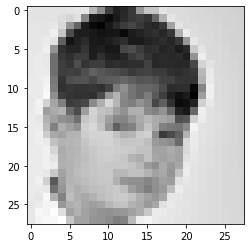

In [8]:
# fix random seed for reproducibility
seed = 1
np.random.seed(seed)
tf.random.set_seed(seed)

# size of images 28X28
width = 28
height = 28

# Initialise the arrays
X =[]
Y =[]


#rows = 2
#cols = 5
#fig, ax = plt.subplots(rows, cols)



# For each of the subdirectories in the images folder, get the filename and preprocess it
for root, dirs, files in os.walk(get_images_location()):
    for name in files:

      # Convert each image to greay scale
      print('Opening file: ', os.path.join(root, name))
      im=Image.open(os.path.join(root, name)).convert('L')
      
      # Resize the images
      # Image.ANTIALIAS a high-quality downsampling filter
      # https://pillow.readthedocs.io/en/3.0.0/reference/Image.html
      im = im.resize((width,height),Image.ANTIALIAS)
      

      
      #Show each image for the CA
      plt.imshow(im, cmap=plt.cm.gray)
      #plt.show()
      
      # Convert to numpy array
      arr = np.array(im)
      
      # add images and class to the two lists
      X.append(arr)
      Y.append(1)  
    
# Convert to NumPy array
X = np.array(X)

In [9]:
# The shape of the input data for the fit function must be in NHWC format
# N is the number of images in the batch
# H is the height of the image
# W is the width 0f the image
# C is the number of channels in the image, 3 for RGB, 1 grayscale

#X = X.reshape(X.shape[0], 1, width, height).astype('float32') - Old format from sample taken from lecturer
X = X.reshape(X.shape[0], height, width, 1).astype('float32')

print('Number of images: ', X.shape[0])
print('Height of images: ', height)
print('Width of images: ', width)
print('Number of image channels:',1)

print('\nNHWC shape is: ', X.shape[0], height, width, 1)


print('X: ', X)

# Normalize the data
X = X /255

# one hot encode outputs
Y = np.array(Y)

# randomize the data set - numpy arrays
randomize = np.arange(len(X))
np.random.shuffle(randomize)
X = X[randomize]
Y = Y[randomize]

Y = to_categorical(Y)
num_classes = Y.shape[1]

Number of images:  201
Height of images:  28
Width of images:  28
Number of image channels: 1

NHWC shape is:  201 28 28 1
X:  [[[[ 64.]
   [ 68.]
   [ 72.]
   ...
   [ 78.]
   [ 92.]
   [114.]]

  [[ 81.]
   [ 83.]
   [ 82.]
   ...
   [ 99.]
   [110.]
   [112.]]

  [[ 75.]
   [ 76.]
   [ 74.]
   ...
   [102.]
   [ 90.]
   [ 86.]]

  ...

  [[ 48.]
   [ 37.]
   [ 30.]
   ...
   [168.]
   [164.]
   [188.]]

  [[ 48.]
   [ 43.]
   [ 36.]
   ...
   [192.]
   [218.]
   [213.]]

  [[ 52.]
   [ 48.]
   [ 46.]
   ...
   [229.]
   [222.]
   [203.]]]


 [[[116.]
   [114.]
   [115.]
   ...
   [109.]
   [107.]
   [107.]]

  [[122.]
   [121.]
   [121.]
   ...
   [110.]
   [110.]
   [108.]]

  [[126.]
   [123.]
   [121.]
   ...
   [110.]
   [110.]
   [110.]]

  ...

  [[106.]
   [110.]
   [115.]
   ...
   [ 54.]
   [ 34.]
   [ 20.]]

  [[103.]
   [104.]
   [112.]
   ...
   [ 63.]
   [ 32.]
   [ 13.]]

  [[ 97.]
   [ 98.]
   [103.]
   ...
   [ 63.]
   [ 32.]
   [ 10.]]]


 [[[ 93.]
   [ 96.]
   [ 96

# Build the CNN Model


In [10]:
# Building a CNN model
# Identify the part of the model Conv Layer, Pooling Layer, etc
# Look at the Keras documentaion on defining a model
np.random.seed(seed) # Initialise the seed for random number generation
tf.random.set_seed(seed) # Set the random seed in tensorflow 


modelC = Sequential() # Initialise a sequential model
# https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/ Jason Brownlee

# Add Convolutional2D layer
modelC.add(Conv2D(32, (3, 3), strides=1, padding="valid", input_shape=(1, width, height), activation='relu', data_format='channels_first'))

# Add MaxPooling layer
modelC.add(MaxPooling2D(pool_size=(2, 2), padding="valid"))

# Flatten the 
modelC.add(Flatten())

# Add relu activation
modelC.add(Dense(128, activation='relu'))

# Add Softmax activation
modelC.add(Dense(num_classes, activation='softmax'))

# Compile the model
modelC.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

# Fit the model
# Model fitting is a measure of how well a machine learning model generalizes to similar data 
# to that on which it was trained. A model that is well-fitted produces more accurate outcomes.
#history = modelC.fit(X, Y, validation_split=0.33, epochs=10, batch_size=32, verbose=1)
history = modelC.fit(X, Y, validation_split=0.33, epochs=2, batch_size=5, verbose=1)

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#five steps in the life-cycle are:
# Define the model. Compile the model.Fit the model. Evaluate the model. Make predictions.

Epoch 1/2


ValueError: in user code:

    C:\Dev\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Dev\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Dev\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Dev\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Dev\Anaconda\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Dev\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Dev\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Dev\Anaconda\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Dev\Anaconda\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential is incompatible with the layer: expected axis -3 of input shape to have value 1 but received input with shape [None, 28, 28, 1]
